<center><img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/></center>
<center><h1><b>DS102 Project - Building Energy Efficiency Analysis and Green Mark Rating Prediction</b></h1></center> 
<h2>Group 7</h2>
<h3>Team members:</h3>
<br>1. Aaron Ang
<br>2. Charis Ching
<br>3. Sean Goh
<br>4. Cheryl Tan
<br>5. Fook Hoi Chung

<h2>Table of Contents</h2>

- 1. [Research Topic and Methodology](#1.0)
- 2. [Dataset of Interest](#2.0)
- 3. [Data Cleaning](#3.0)
- 4. [Exploratory Data Analysis](#4.0)
- 5. [Green Mark Rating Prediction](#5.0)
- 6. [Insights and Evaluation](#6.0)

<a id='1.0'><h2>1. Research Topic and Methodology</h2></a>
<p>
Our topic of focus is on the energy efficiency of Singapore's buildings. We would like to find out the relationship between characteristics of local buildings and the subsequent energy efficiency score (BCA Green Mark rating) that has been awarded to them. We will utilize Machine Learning algorithms, using both Linear Regression and Decision Tree models, to predict the Green Mark rating. We will use the sklearn's R<sup>2</sup> score and Classification Report to evaluate the models' accuracy.
</p>
<p>Finally, as part of our Insights and Evaluation, we will plot the buildings as points on a map of Singapore using mplleaflet, characterised by their Green Mark rating. From the graph, we will analyse trends and suggest areas of improvement for future renovation/upgrading and construction projects.
<p>
We hope that our project can help building developers find out if their proposed construction project meets the standards of their targeted building efficiency rating. As creating an eco-friendly environment is one of the main goals moving forward to achieve sustainable living, we believe our research topic is pertitent and useful.
</p>

<a id='2.0'><h2>2. Dataset of Interest</h2></a>
<p>
The dataset that we will be using is titled "<a href="https://data.gov.sg/dataset/building-energy-performance-data">Voluntary Disclosed Building Energy Performance Data</a>", found at <a href="https://data.gov.sg/">Data.gov.sg</a>. 
</p>
<p>
The data is provided in CSV format, containing updated information on self-disclosed building energy performance since 2017. The categories provided include the building name, address, type, Green Mark Rating, etc. Most of the columns will be used for our Machine Learning model. The dataset contains 1,244 records which is a large enough sample size to generate reliable results.
</p>

<a id='3.0'><h2>3. Data Cleaning</h2></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split # dataframe splitting
from sklearn.linear_model import LinearRegression # linear regression model
from sklearn.tree import DecisionTreeClassifier # Decision Tree model
from sklearn.metrics import r2_score # model scoring metric
from sklearn.metrics import confusion_matrix 

In [2]:
building_df = pd.read_csv('listing-of-building-energy-performance-data-for-commercial-buildings.csv',thousands=',')
building_df.head()

buildingname                       buildingaddress       buildingtype  \
0          HEXACUBE     160 CHANGI ROAD, SINGAPORE 419728  Mixed Development   
1               NaN                                   NaN             Retail   
2  CITY SQUARE MALL  180 KITCHENER ROAD, SINGAPORE 208539             Retail   
3    REPUBLIC PLAZA     9 RAFFLES PLACE, SINGAPORE 048619             Office   
4      CENTRAL MALL     1 MAGAZINE ROAD, SINGAPORE 059567             Office   

  greenmarkstatus greenmarkrating  greenmarkyearaward buildingsize  \
0              No             NaN                 NaN        Small   
1              No             NaN                 NaN        Small   
2             Yes        Platinum              2018.0        Large   
3             Yes        Platinum              2018.0        Large   
4             Yes        Platinum              2017.0        Large   

   grossfloorarea  2017energyuseintensity  2018energyusintensity  \
0          5036.0                    81.0                  105.0   
1             NaN                   475.0                  402.0   
2         65640.0                   382.0                  365.0   
3        102356.0                   212.0                  183.0   
4         15769.0                   203.0                  181.0   

  voluntarydisclosure  
0                   Y  
1                   N  
2                   Y  
3                   Y  
4                   Y

In [3]:
building_df.shape

(1244, 11)

In [4]:
# Find missing values
building_df.isna().sum()

buildingname              461
buildingaddress           258
buildingtype                0
greenmarkstatus             0
greenmarkrating           938
greenmarkyearaward        938
buildingsize               55
grossfloorarea            258
2017energyuseintensity     20
2018energyusintensity      20
voluntarydisclosure         0
dtype: int64

In [5]:
# Check out rows with missing 'energyuseintensity' data
building_df[building_df['2017energyuseintensity'].isna()]

buildingname                             buildingaddress  \
204   MAPLETREE BUSINESS CITY     20 PASIR PANJANG ROAD, SINGAPORE 117439   
544             CENTRAL PLAZA      298 TIONG BAHRU ROAD, SINGAPORE 168730   
652                       NaN    16 COLLEGE AVENUE WEST, SINGAPORE 138527   
735                       NaN  20 LOWER KENT RIDGE ROAD, SINGAPORE 119080   
737                       NaN                                         NaN   
738                       NaN                                         NaN   
739                       NaN          2 SPORTS DRIVE 1, SINGAPORE 117561   
740                       NaN    5A ENGINEERING DRIVE 1, SINGAPORE 117411   
759                       NaN           1 RESEARCH LINK, SINGAPORE 117604   
1154                      NaN             1G CLUNY ROAD, SINGAPORE 259603   
1210                      NaN                                         NaN   
1211                      NaN                                         NaN   
1212                      NaN                                         NaN   
1215                      NaN                                         NaN   
1216                      NaN                                         NaN   
1217                      NaN                                         NaN   
1218                      NaN                                         NaN   
1223                      NaN                                         NaN   
1224                      NaN                                         NaN   
1227                      NaN              1 CREATE WAY, SINGAPORE 138602   

     buildingtype greenmarkstatus greenmarkrating  greenmarkyearaward  \
204        Office             Yes        Platinum              2014.0   
544        Office             Yes        Platinum              2016.0   
652   Univerisity             Yes        Platinum              2018.0   
735   Univerisity              No             NaN                 NaN   
737        Office              No             NaN                 NaN   
738   Univerisity             Yes             NaN                 NaN   
739   Univerisity              No             NaN                 NaN   
740   Univerisity             Yes            Gold              2014.0   
759   Univerisity              No             NaN                 NaN   
1154       Office              No             NaN                 NaN   
1210  Univerisity             Yes             NaN                 NaN   
1211  Univerisity             Yes             NaN                 NaN   
1212  Univerisity             Yes             NaN                 NaN   
1215  Univerisity              No             NaN                 NaN   
1216  Univerisity              No             NaN                 NaN   
1217  Univerisity              No             NaN                 NaN   
1218  Univerisity              No             NaN                 NaN   
1223  Univerisity              No             NaN                 NaN   
1224  Univerisity              No             NaN                 NaN   
1227  Univerisity             Yes        Platinum              2017.0   

     buildingsize  grossfloorarea  2017energyuseintensity  \
204         Large        128557.0                     NaN   
544         Large         20886.0                     NaN   
652         Large         63238.0                     NaN   
735         Small          3744.0                     NaN   
737         Large             NaN                     NaN   
738           NaN             NaN                     NaN   
739         Small          9031.0                     NaN   
740         Large         26049.0                     NaN   
759         Large         16164.0                     NaN   
1154        Small           977.0                     NaN   
1210          NaN             NaN                     NaN   
1211          NaN             NaN                     NaN   
1212          NaN             NaN                     NaN   
1215       

In [6]:
# Since we cannot replace NaN values in energyuseintensity and buildingsize columns, we shall drop them
building_df = building_df.dropna(subset=['2017energyuseintensity','buildingsize'])
building_df.isna().sum()

buildingname              398
buildingaddress           202
buildingtype                0
greenmarkstatus             0
greenmarkrating           878
greenmarkyearaward        878
buildingsize                0
grossfloorarea            202
2017energyuseintensity      0
2018energyusintensity       0
voluntarydisclosure         0
dtype: int64

In [7]:
# greenmarkrating == NaN means building is NOT Green Mark certified, hence we can keep and replace these values
building_df['greenmarkrating'].fillna('None', inplace=True)
building_df.dtypes

buildingname               object
buildingaddress            object
buildingtype               object
greenmarkstatus            object
greenmarkrating            object
greenmarkyearaward        float64
buildingsize               object
grossfloorarea            float64
2017energyuseintensity    float64
2018energyusintensity     float64
voluntarydisclosure        object
dtype: object

In [8]:
# Drop redundant columns that are not useful to Machine Learning Model. Green Mark rating is a subset of Green Mark status,
# hence we drop the greenmarkstatus column in favour of the more specific column
new_building_df = building_df.drop(['buildingname','buildingaddress','greenmarkstatus','greenmarkyearaward','voluntarydisclosure'], axis=1)
new_building_df.head()

buildingtype greenmarkrating buildingsize  grossfloorarea  \
0  Mixed Development            None        Small          5036.0   
1             Retail            None        Small             NaN   
2             Retail        Platinum        Large         65640.0   
3             Office        Platinum        Large        102356.0   
4             Office        Platinum        Large         15769.0   

   2017energyuseintensity  2018energyusintensity  
0                    81.0                  105.0  
1                   475.0                  402.0  
2                   382.0                  365.0  
3                   212.0                  183.0  
4                   203.0                  181.0

In [9]:
# Find out unique values
print(new_building_df['greenmarkrating'].unique())
print(new_building_df['buildingtype'].unique())

['None' 'Platinum' 'Gold' 'GoldPlus' 'Certified' 'Legislated']
['Mixed Development' 'Retail' 'Office' 'Hotel' 'Community Hospital'
 'Private Clinic' 'Polytechnic'
 'General Hospital/ Specialist Centre (Public)' 'Nursing Home'
 'Private School' 'Univerisity' 'Specialist Centre (Public)' 'TCM Clinic'
 'ITE' 'Private Hospital (Private)' 'Private College' 'Polyclinic']


In [10]:
# Find out which building is labeled 'Legislated' as it is an unexpected rating(it did not appear during our research)
building_df[building_df['greenmarkrating']=='Legislated']

buildingname                                buildingaddress buildingtype  \
825          NaN  984 UPPER CHANGI ROAD NORTH, SINGAPORE 506969       Office   

    greenmarkstatus greenmarkrating  greenmarkyearaward buildingsize  \
825             Yes      Legislated              2015.0        Large   

     grossfloorarea  2017energyuseintensity  2018energyusintensity  \
825        355068.0                   233.0                  235.0   

    voluntarydisclosure  
825                   Y

In [11]:
# Since the only 'Legislated' rated building has a large gross floor area, won an award in year 2015, and has relatively
# low energy use intensity, we can group it as having the 'Platinum' rating

In [12]:
# Identify remaining missing values
new_building_df.isna().sum() 

buildingtype                0
greenmarkrating             0
buildingsize                0
grossfloorarea            202
2017energyuseintensity      0
2018energyusintensity       0
dtype: int64

In [13]:
# Find mean gross floor area based on building type and building size
gb_mean = new_building_df.groupby(['buildingtype','buildingsize']).mean()
gb_mean_area = gb_mean['grossfloorarea']
gb_mean_area

buildingtype                                  buildingsize
Community Hospital                            Large            24324.500000
                                              Small            12484.500000
General Hospital/ Specialist Centre (Public)  Large           128443.875000
Hotel                                         Large            27851.277778
                                              Small             1511.316547
ITE                                           Large           140373.333333
Mixed Development                             Large            91873.962963
                                              Small             5495.736842
Nursing Home                                  Large            68840.333333
                                              Small             6163.333333
Office                                        Large            48041.889447
                                              Small             5421.673307
Polyclinic                   

In [14]:
# replace NaN values with mean values based on building type and size
for b_type in new_building_df['buildingtype'].unique():
    for b_size in new_building_df['buildingsize'].unique():
        if b_size in new_building_df[new_building_df['buildingtype']== b_type]['buildingsize'].tolist():
            new_building_df.loc[(new_building_df.buildingtype == b_type) 
                                & (new_building_df.buildingsize == b_size) 
                                & (new_building_df.grossfloorarea.isnull()),'grossfloorarea'] = gb_mean_area[b_type][b_size]

In [15]:
# To visualize above code...
for b_type in new_building_df['buildingtype'].unique():
    print(b_type)
    for b_size in new_building_df['buildingsize'].unique():
        if b_size in new_building_df[new_building_df['buildingtype']== b_type]['buildingsize'].tolist():
            print(b_size)
    print('')

Mixed Development
Small
Large

Retail
Small
Large

Office
Small
Large

Hotel
Small
Large

Community Hospital
Small
Large

Private Clinic
Small
Large

Polytechnic
Small
Large

General Hospital/ Specialist Centre (Public)
Large

Nursing Home
Small
Large

Private School
Small
Large

Univerisity
Small
Large

Specialist Centre (Public)
Small
Large

TCM Clinic
Large

ITE
Large

Private Hospital (Private)
Small
Large

Private College
Small
Large

Polyclinic
Small



In [16]:
new_building_df.isna().sum() # No more missing values

buildingtype              0
greenmarkrating           0
buildingsize              0
grossfloorarea            0
2017energyuseintensity    0
2018energyusintensity     0
dtype: int64

<a id='4.0'><h2>4. Exploratory Data Analysis</h2></a>

In [17]:
new_building_df.head()

buildingtype greenmarkrating buildingsize  grossfloorarea  \
0  Mixed Development            None        Small     5036.000000   
1             Retail            None        Small     5771.627907   
2             Retail        Platinum        Large    65640.000000   
3             Office        Platinum        Large   102356.000000   
4             Office        Platinum        Large    15769.000000   

   2017energyuseintensity  2018energyusintensity  
0                    81.0                  105.0  
1                   475.0                  402.0  
2                   382.0                  365.0  
3                   212.0                  183.0  
4                   203.0                  181.0

<AxesSubplot:>

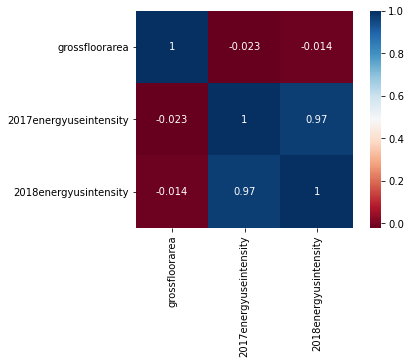

In [18]:
# Visualize correlation between numerical columns
sns.heatmap(new_building_df.corr(), annot=True, cmap='RdBu', square=True) 
# There seems to be no correlation between floor area and energy use intensity, 
# and large correlation between 2017's and 2018's energy efficiency, both of which are expected

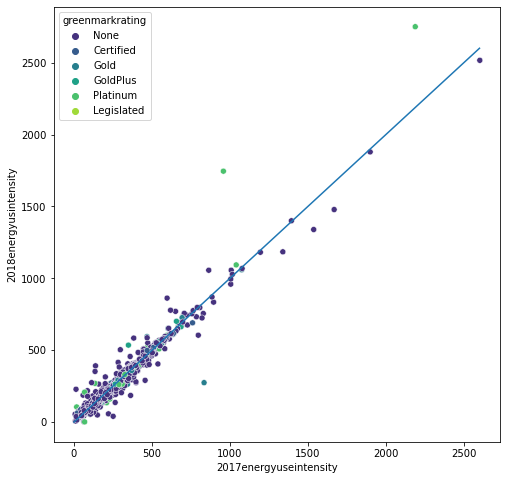

In [19]:
# Compare energy use intensity in 2017 and 2018
fig=plt.figure(figsize=(8,8))
sns.scatterplot(y ='2018energyusintensity', x ='2017energyuseintensity', data=new_building_df, hue='greenmarkrating', hue_order=['None','Certified','Gold','GoldPlus','Platinum','Legislated'],palette='viridis')
x= np.linspace(0,2600,100)
y= x
plt.plot(x,y)
plt.show()
# From the figure, there seems to be no distinct pattern in identifying Green Mark rating based on energy efficiency,
# and most buildings' energy use intensity levels have remained the same over the two years.

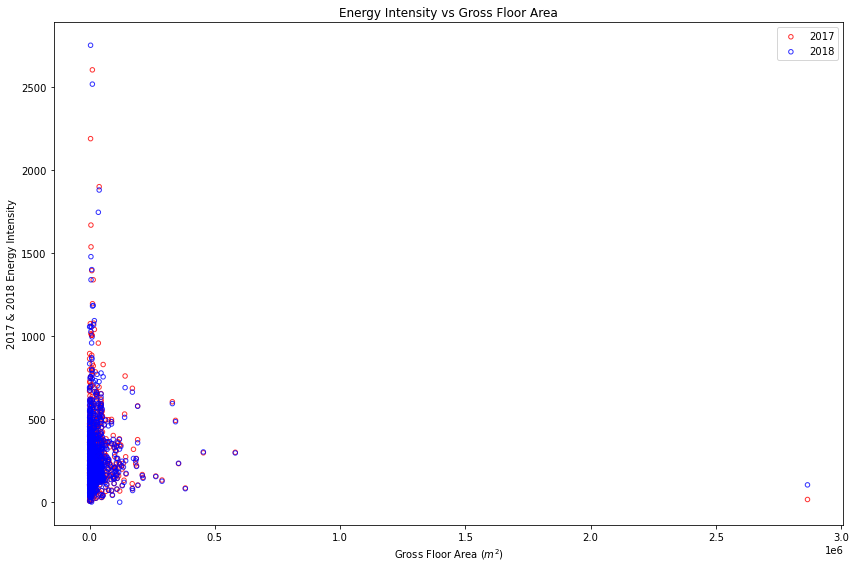

In [20]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1) 

new_building_df.plot(x ='grossfloorarea', y ='2017energyuseintensity', kind='scatter', label='2017',ax=ax,c='None',edgecolors='r',alpha=0.8)
new_building_df.plot(x ='grossfloorarea', y ='2018energyusintensity',  kind='scatter', label='2018',ax=ax,c='None',edgecolors='b',alpha=0.8)
ax.set_title('Energy Intensity vs Gross Floor Area')
ax.set_xlabel('Gross Floor Area ($m^2$)')
ax.set_ylabel('2017 & 2018 Energy Intensity')


plt.tight_layout()

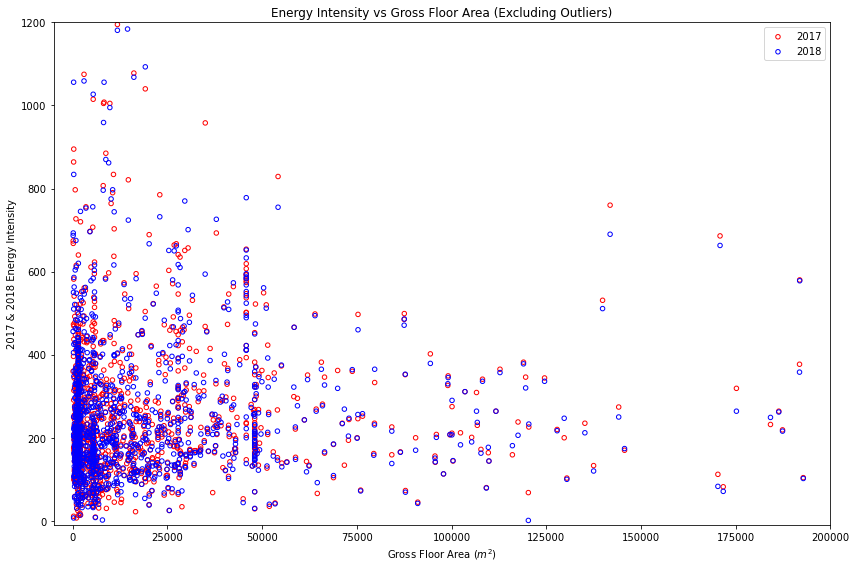

In [21]:
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(1,1,1) 

new_building_df.plot(x ='grossfloorarea', y ='2017energyuseintensity', kind='scatter', label='2017',ax=ax2,c='None',edgecolors='r')
new_building_df.plot(x ='grossfloorarea', y ='2018energyusintensity',  kind='scatter', label='2018',ax=ax2,c='None',edgecolors='b')
ax2.set_title('Energy Intensity vs Gross Floor Area (Excluding Outliers)')
ax2.set_xlabel('Gross Floor Area ($m^2$)')
ax2.set_ylabel('2017 & 2018 Energy Intensity')
ax2.set_xlim(-5000,200000)
ax2.set_ylim(-10,1200)
plt.tight_layout()
# From the graphs, we notice a few outliers in terms of Gross Floor Area and Energy Use Intensity. 
# While smaller buildings generally reduced their energy use intensity, 
# the outliers have larger variance in terms of energy use in 2018 compared to 2017.

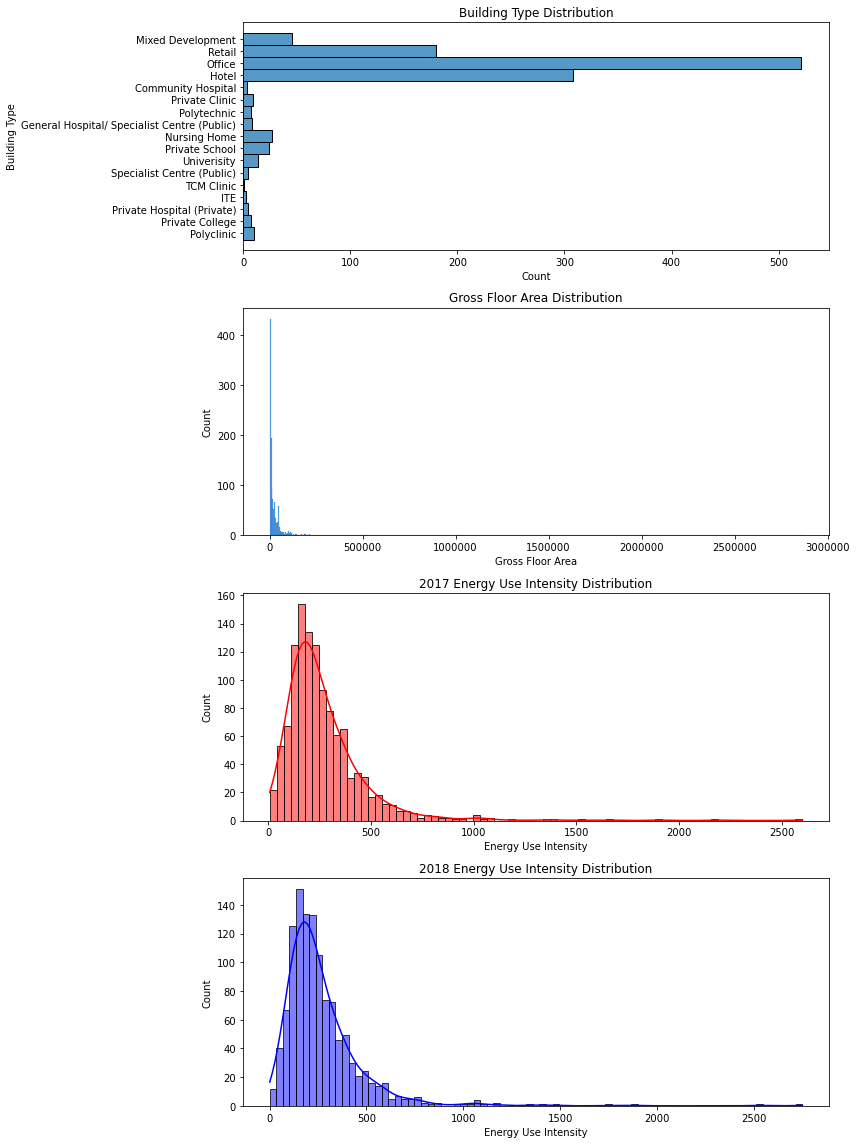

In [22]:
fig = plt.figure(figsize=(12,16))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

sns.histplot(y=new_building_df['buildingtype'], ax=ax1)
ax1.set_title('Building Type Distribution')
ax1.set_ylabel('Building Type')

sns.histplot(new_building_df['grossfloorarea'],ax=ax2, color='dodgerblue')
ax2.ticklabel_format(style='plain')
ax2.set_title('Gross Floor Area Distribution')
ax2.set_xlabel('Gross Floor Area')

sns.histplot(new_building_df['2017energyuseintensity'],ax=ax3,color='red',kde=True)
ax3.set_title('2017 Energy Use Intensity Distribution')
ax3.set_xlabel('Energy Use Intensity')

sns.histplot(new_building_df['2018energyusintensity'],ax=ax4,color='blue',kde=True)
ax4.set_title('2018 Energy Use Intensity Distribution')
ax4.set_xlabel('Energy Use Intensity')

plt.tight_layout()

In [23]:
# Most commercial buildings in Singapore are offices. The majority of the buildings are also small, 
# with a large distribution to almost 3,000,000 m^2 of floor area. It is also evident from the last two graphs
# that the energy use intensity of buildings generally decreased.

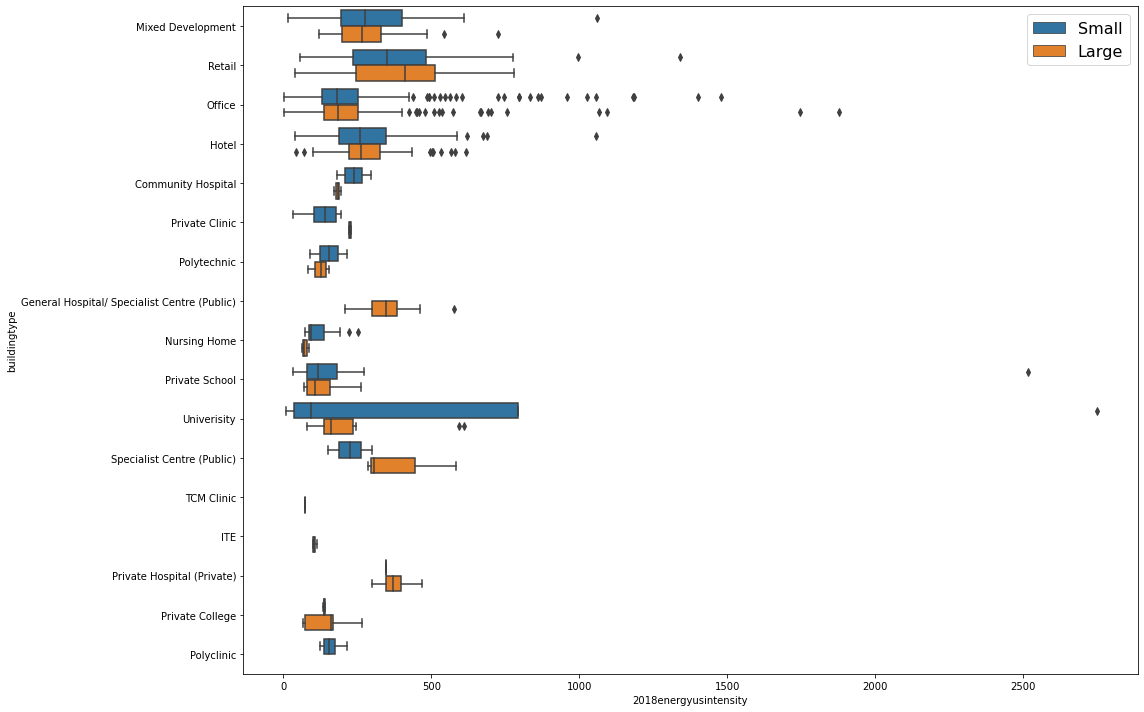

In [24]:
# Since energy use in 2018 and 2017 are similar, we shall visualize the 2018 energy use with respect to the type and size 
# of building. 
plt.figure(figsize=(16,10))
sns.boxplot(y='buildingtype',x='2018energyusintensity',data=new_building_df,hue='buildingsize')
plt.legend(prop={'size': 16})
plt.tight_layout()
# Nursing Homes, Private Schools, and ITEs have the lowest median energy use intensity.

<a id='5.0'><h2>5. Green Mark Rating Prediction</h2></a>

In [25]:
# Label encode columns to be used for Machine Learning

def rating_encode(rating):
    if rating == 'None':
        return 0
    elif rating == 'Certified':
        return 1
    elif rating == 'Gold':
        return 2
    elif rating == 'GoldPlus':
        return 3
    elif rating == 'Platinum' or rating == 'Legislated': 
        return 4

new_building_df['greenmark_int'] = new_building_df['greenmarkrating'].apply(rating_encode)
new_building_df.head()

buildingtype greenmarkrating buildingsize  grossfloorarea  \
0  Mixed Development            None        Small     5036.000000   
1             Retail            None        Small     5771.627907   
2             Retail        Platinum        Large    65640.000000   
3             Office        Platinum        Large   102356.000000   
4             Office        Platinum        Large    15769.000000   

   2017energyuseintensity  2018energyusintensity  greenmark_int  
0                    81.0                  105.0              0  
1                   475.0                  402.0              0  
2                   382.0                  365.0              4  
3                   212.0                  183.0              4  
4                   203.0                  181.0              4

In [26]:
# One-hot encoding for 'buildingtype' and 'buildingsize' since they are categorical values, 
# drop first column to prevent multicollinearity (two or more independent variables having high linear correlation)
building_enc = pd.get_dummies(new_building_df, columns=['buildingtype','buildingsize'],drop_first=True)
building_enc.head()

greenmarkrating  grossfloorarea  2017energyuseintensity  \
0            None     5036.000000                    81.0   
1            None     5771.627907                   475.0   
2        Platinum    65640.000000                   382.0   
3        Platinum   102356.000000                   212.0   
4        Platinum    15769.000000                   203.0   

   2018energyusintensity  greenmark_int  \
0                  105.0              0   
1                  402.0              0   
2                  365.0              4   
3                  183.0              4   
4                  181.0              4   

   buildingtype_General Hospital/ Specialist Centre (Public)  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           

   buildingtype_Hotel  buildingtype_ITE  buildingtype_Mixed Development  \
0                   0                 0                               1   
1                   0                 0                               0   
2                   0                 0                               0   
3                   0                 0                               0   
4                   0                 0                               0   

   buildingtype_Nursing Home  ...  buildingtype_Polytechnic  \
0                          0  ...                         0   
1                          0  ...                         0   
2                          0  ...                         0   
3                          0  ...                         0   
4                          0  ...                         0   

   buildingtype_Private Clinic  buildingtype_Private College  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   

   buildingtype_Private Hospital (Private)  buildingtype_Private School  \
0                                        0                            0   
1                                        0                            0   
2                                        0                            0   
3                                        0                            0   
4                                        0                            0   

   buildingtype_Retail  buildingtype_Specialist Centre (Public)  \
0                    0                                        0   
1                    1                                        0   
2                    1                                        0   
3                    0                                        0   
4                    0                                        0   

   buildingtype_TCM Clinic  buildingtype_Univerisity  buildingsize_Small  
0                        0                         0                   1  
1                        0                         0                   1  
2                        0                         0                   0  
3                        0                         0                   0  
4                        0                         0                   0  

[5 rows x 22 columns]

In [27]:
building_enc.dtypes

greenmarkrating                                               object
grossfloorarea                                               float64
2017energyuseintensity                                       float64
2018energyusintensity                                        float64
greenmark_int                                                  int64
buildingtype_General Hospital/ Specialist Centre (Public)      uint8
buildingtype_Hotel                                             uint8
buildingtype_ITE                                               uint8
buildingtype_Mixed Development                                 uint8
buildingtype_Nursing Home                                      uint8
buildingtype_Office                                            uint8
buildingtype_Polyclinic                                        uint8
buildingtype_Polytechnic                                       uint8
buildingtype_Private Clinic                                    uint8
buildingtype_Private College      

In [28]:
# Retain only numeric columns in DataFrame
building_numeric_df = building_enc.drop('greenmarkrating', axis=1)
building_numeric_df.columns

Index(['grossfloorarea', '2017energyuseintensity', '2018energyusintensity',
       'greenmark_int',
       'buildingtype_General Hospital/ Specialist Centre (Public)',
       'buildingtype_Hotel', 'buildingtype_ITE',
       'buildingtype_Mixed Development', 'buildingtype_Nursing Home',
       'buildingtype_Office', 'buildingtype_Polyclinic',
       'buildingtype_Polytechnic', 'buildingtype_Private Clinic',
       'buildingtype_Private College',
       'buildingtype_Private Hospital (Private)',
       'buildingtype_Private School', 'buildingtype_Retail',
       'buildingtype_Specialist Centre (Public)', 'buildingtype_TCM Clinic',
       'buildingtype_Univerisity', 'buildingsize_Small'],
      dtype='object')

In [29]:
# Scale non-encoded values using Standard Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

ct = make_column_transformer((StandardScaler(), ['grossfloorarea', '2017energyuseintensity', '2018energyusintensity']), remainder='passthrough')
building_transformed = ct.fit_transform(building_numeric_df)
building_transformed_df = pd.DataFrame(building_transformed, columns=building_numeric_df.columns)
building_transformed_df.head()

grossfloorarea  2017energyuseintensity  2018energyusintensity  \
0       -0.218228               -0.913838              -0.773726   
1       -0.210330                1.012081               0.642570   
2        0.432454                0.557486               0.466129   
3        0.826660               -0.273494              -0.401770   
4       -0.102992               -0.317487              -0.411307   

   greenmark_int  buildingtype_General Hospital/ Specialist Centre (Public)  \
0            0.0                                                0.0           
1            0.0                                                0.0           
2            4.0                                                0.0           
3            4.0                                                0.0           
4            4.0                                                0.0           

   buildingtype_Hotel  buildingtype_ITE  buildingtype_Mixed Development  \
0                 0.0               0.0                             1.0   
1                 0.0               0.0                             0.0   
2                 0.0               0.0                             0.0   
3                 0.0               0.0                             0.0   
4                 0.0               0.0                             0.0   

   buildingtype_Nursing Home  buildingtype_Office  ...  \
0                        0.0                  0.0  ...   
1                        0.0                  0.0  ...   
2                        0.0                  0.0  ...   
3                        0.0                  1.0  ...   
4                        0.0                  1.0  ...   

   buildingtype_Polytechnic  buildingtype_Private Clinic  \
0                       0.0                          0.0   
1                       0.0                          0.0   
2                       0.0                          0.0   
3                       0.0                          0.0   
4                       0.0                          0.0   

   buildingtype_Private College  buildingtype_Private Hospital (Private)  \
0                           0.0                                      0.0   
1                           0.0                                      0.0   
2                           0.0                                      0.0   
3                           0.0                                      0.0   
4                           0.0                                      0.0   

   buildingtype_Private School  buildingtype_Retail  \
0                          0.0                  0.0   
1                          0.0                  1.0   
2                          0.0                  1.0   
3                          0.0                  0.0   
4                          0.0                  0.0   

   buildingtype_Specialist Centre (Public)  buildingtype_TCM Clinic  \
0                                      0.0                      0.0   
1                                      0.0                      0.0   
2                                      0.0                      0.0   
3                                      0.0                      0.0   
4                                      0.0                      0.0   

   buildingtype_Univerisity  buildingsize_Small  
0                       0.0                 1.0  
1                       0.0                 1.0  
2                       0.0                 0.0  
3                       0.0                 0.0  
4                       0.0                 0.0  

[5 rows x 21 columns]

<h3>Linear Regression</h3>

In [30]:
lr = LinearRegression()
X = building_transformed_df.drop(['greenmark_int'], axis=1)
y = building_transformed_df['greenmark_int']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
import math
y_pred = lr.predict(X_test)
pred_values = []
for x in y_pred:
    pred_values.append(math.floor(x))
pred_values
print(r2_score(y_test,pred_values))

0.14430049702599212


In [32]:
# It is evident that multivariate linear regression is not a good model for this dataset, 
# as the awards given do not seem to follow a linear relationship based on energy use intensity (2nd graph of EDA)

<h3> Decision Tree Classifier</h3>

In [33]:
X = building_transformed_df.drop(['greenmark_int'], axis=1)
y = building_transformed_df['greenmark_int']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

building_dtree = DecisionTreeClassifier(random_state=42)
building_dtree.fit(X_train, y_train)
print("Depth of Tree", building_dtree.tree_.max_depth)

Depth of Tree 23


[0.46485449 0.20225383 0.19064236 0.00248489 0.0179282  0.
 0.02705859 0.00330312 0.02742239 0.00217428 0.00289904 0.
 0.00375919 0.00704052 0.00676406 0.027604   0.         0.
 0.00650197 0.00730908]


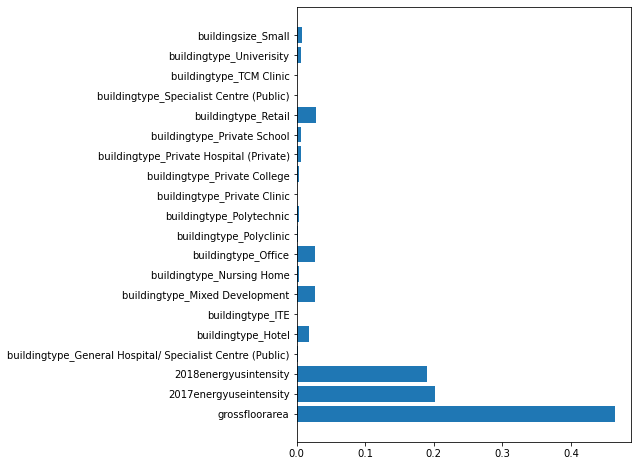

In [34]:
features = X.columns
plt.figure(figsize=(6,8))
plt.barh(features, building_dtree.feature_importances_)
print(building_dtree.feature_importances_)

<a id='6.0'><h2>6. Insights and Evaluation</h2></a>

[[153   7   4   6   7]
 [  6   1   1   3   0]
 [  6   0   3   0   3]
 [  6   1   1   3   4]
 [ 12   2   1   0   6]]


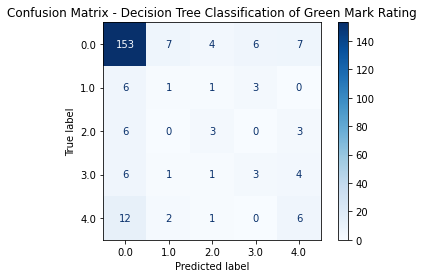

In [35]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(building_dtree, X_test, y_test, cmap='Blues')
disp.ax_.set_title('Confusion Matrix - Decision Tree Classification of Green Mark Rating')
print(disp.confusion_matrix)

In [36]:
from sklearn.metrics import classification_report
pred = building_dtree.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       177
         1.0       0.09      0.09      0.09        11
         2.0       0.30      0.25      0.27        12
         3.0       0.25      0.20      0.22        15
         4.0       0.30      0.29      0.29        21

    accuracy                           0.70       236
   macro avg       0.36      0.34      0.35       236
weighted avg       0.69      0.70      0.70       236



In [37]:
# While the Decision Tree model can predict Non-certified buildings with relatively high precision and recall,
# it is wildly inaccurate in predicting the rest of the Green Mark-rated buildings. One possible reason is that
# there are too many Non-Certified buildings compared to Certified ones in both the training set and test set. 
# Hence, the model cannot assign feature importances to characteristics that maximises its predictive ability.

In [38]:
# We shall now visualize the spread of these buildings across Singapore. We used a Geocoding API to return the 
# longitudes and latitudes of each building as they were not provided in the dataset. The dataset is then saved as csv.

In [39]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install mplleaflet

Note: you may need to restart the kernel to use updated packages.


In [41]:
building_location_df = pd.DataFrame(building_df[['buildingname','buildingaddress','buildingtype','greenmarkrating']]).dropna(subset=['buildingaddress'])
building_location_df.head()

buildingname                           buildingaddress  \
0          HEXACUBE         160 CHANGI ROAD, SINGAPORE 419728   
2  CITY SQUARE MALL      180 KITCHENER ROAD, SINGAPORE 208539   
3    REPUBLIC PLAZA         9 RAFFLES PLACE, SINGAPORE 048619   
4      CENTRAL MALL         1 MAGAZINE ROAD, SINGAPORE 059567   
5             KINEX  11 TANJONG KATONG ROAD, SINGAPORE 437157   

        buildingtype greenmarkrating  
0  Mixed Development            None  
2             Retail        Platinum  
3             Office        Platinum  
4             Office        Platinum  
5             Retail            Gold

In [42]:
# An example of the API 
from geopy.geocoders import MapQuest
KEY = 'JqWvxoKduUg0QKuYJXC4Tp0m3UUTOo9Z'
locator = MapQuest(KEY)
location = locator.geocode('11 TANJONG KATONG ROAD, SINGAPORE 437157')
print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))
print(location)
point = location.point
print(location.point)

Latitude = 1.315063, Longitude = 103.89463
11 Tanjong Katong Road, Geylang, Southeast, SG, 437157
1 18m 54.2268s N, 103 53m 40.668s E


In [43]:
# Creating functions to apply to DataFrame
from geopy.geocoders import MapQuest
KEY = 'JqWvxoKduUg0QKuYJXC4Tp0m3UUTOo9Z'
locator = MapQuest(KEY)

def lat_finder(address):
    location = locator.geocode(address)
    return location.latitude

def long_finder(address):
    location = locator.geocode(address)
    return location.longitude

In [44]:
# building_location_df['lat'] = building_location_df['buildingaddress'].apply(lat_finder)
# building_location_df['long'] = building_location_df['buildingaddress'].apply(long_finder)

In [45]:
# building_location_df.to_csv('building_coords.csv', index=False)

In [46]:
building_location_df = pd.read_csv('building_coords.csv')
building_location_df.head()

buildingname                           buildingaddress  \
0          HEXACUBE         160 CHANGI ROAD, SINGAPORE 419728   
1  CITY SQUARE MALL      180 KITCHENER ROAD, SINGAPORE 208539   
2    REPUBLIC PLAZA         9 RAFFLES PLACE, SINGAPORE 048619   
3      CENTRAL MALL         1 MAGAZINE ROAD, SINGAPORE 059567   
4             KINEX  11 TANJONG KATONG ROAD, SINGAPORE 437157   

        buildingtype greenmarkrating       lat        long  
0  Mixed Development            None  1.316481  103.899281  
1             Retail        Platinum  1.311243  103.856577  
2             Office        Platinum  1.282353  103.850762  
3             Office        Platinum  1.288610  103.842318  
4             Retail            Gold  1.315063  103.894630

In [47]:
import mplleaflet
building_location_df.plot(kind='scatter', x='long', y='lat')
mplleaflet.display()
# An unexpected location has appeared in Europe.

In [48]:
# Since lat and long of Singapore's addresses are within a range, we can find the coordinates of the outlier
for lat in building_location_df['lat']:
    if lat > 2:
        print(lat)

52.51253199999999


In [49]:
for long in building_location_df['long']:
    if long < 100:
        print(long)       

5.064511


In [50]:
# Locating the source 
building_location_df[building_location_df['lat']==52.51253199999999]

buildingname                  buildingaddress buildingtype  \
681          NaN  1 COVE AVENUE, SINGAPORE 098537       Office   

    greenmarkrating        lat      long  
681            Gold  52.512532  5.064511

In [51]:
# We then googled for the correct coordinates and changed it accordingly
building_location_df['lat'] = building_location_df['lat'].replace([52.51253199999999], 1.24773)
building_location_df['long'] = building_location_df['long'].replace([5.064511], 103.838038)

In [52]:
colors = {'None':'orangered','Certified':'yellow','Gold':'mediumseagreen','GoldPlus':'seagreen','Platinum':'green','Legislated':'green'}
building_location_df.plot(kind='scatter', x='long', y='lat', c=building_location_df['greenmarkrating'].apply(lambda x: colors[x]), marker='o',s=30, alpha=0.8)
mplleaflet.show()

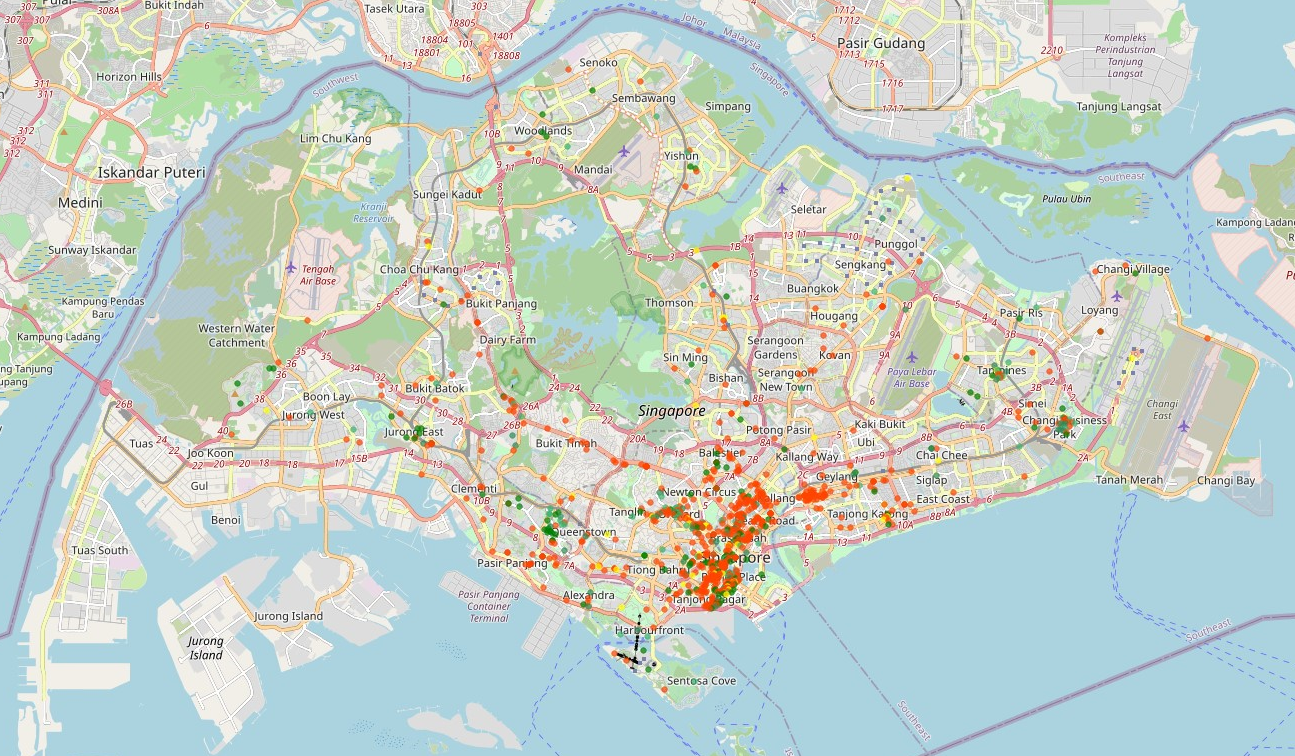

In [53]:
from IPython.display import Image
Image(filename='energy_efficiency_viz.png') 

In [54]:
# Most commercial buildings reside in the South/CBD of Singapore, and are not Green Mark certified. 
# Perhaps due to the older age of the buildings, they are not equipped with energy saving features. 
# Newer developments in Jurong East, Changi Business Park, and Buona Vista are seeing a rise in Green Mark-awarded buildings.
# As a recommendation, maybe it is time to relook at older buildings especially in the South of Singapore where most
# activity is taking place, and work on upgrading and renovating existing facilities to achieve better energy efficiency.

In [55]:
# https://matplotlib.org/api/markers_api.html
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
# https://matplotlib.org/3.3.3/tutorials/colors/colormaps.html
# https://seaborn.pydata.org/tutorial/color_palettes.html